### 071人間関係の可視化

In [1]:
# preparation
import pandas as pd
df_links = pd.read_csv('sample/08ch/links.csv')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# グラフィックオブジェクトの作成
G = nx.Graph()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


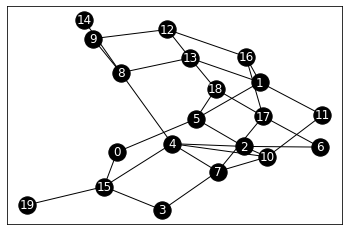

In [3]:
# 頂点の設定
NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip('Node')
    #print(node_no)
    G.add_node(str(node_no))
    
# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        #print(i,j)
        node_name = 'Node' + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
            
# 描画
nx.draw_networkx(G, node_color='k', edge_color='k', font_color='w')
plt.show()

### 072口コミによる情報伝達の可視化

In [4]:
# preparation
import numpy as np

In [5]:
# 口コミを伝播させるか関数
def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [6]:
# 口コミをシュミレートする関数
def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                node_name = 'Node' + str(j)
                if df_links[node_name].iloc[i]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active

In [7]:
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    list_timeSeries.append(list_active.copy())

In [8]:
def active_node_coloring(list_active):
    #print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append('r')
        else:
            list_color.append('k')
    #print(len(list_color))
    return list_color

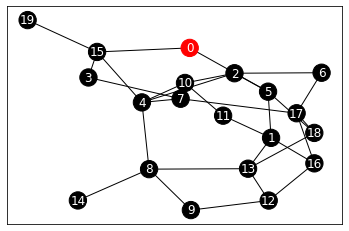

In [9]:
t = 0
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

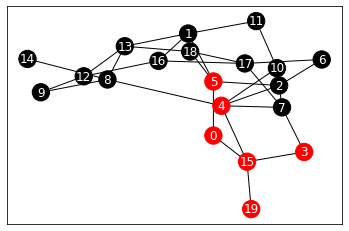

In [10]:
t = 11
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

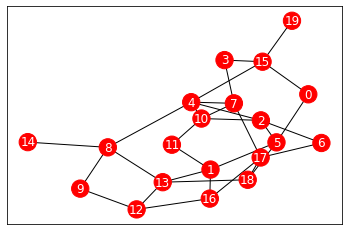

In [12]:
t = 35
nx.draw_networkx(G, font_color='w', node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

### 073口コミ数の時系列変化をグラフ化

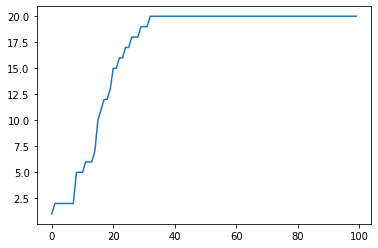

In [13]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

### 074会員数の時系列変化のシュミレーション

In [14]:
def simulate_population(num, list_active, percent_percolation, percent_disapparence, df_links):
    # 拡散 #
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    # 消滅 #
    for i in range(num):
        if determine_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

In [40]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

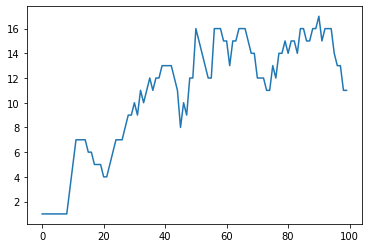

In [41]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

In [42]:
percent_percolation = 0.1
percent_disapparence = 0.2
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM, list_active, percent_percolation, percent_disapparence, df_links)
    list_timeSeries.append(list_active.copy())

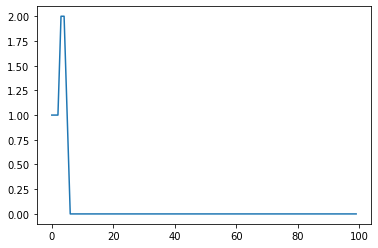

In [43]:
# 口コミの消滅
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()